In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as plt
df  = pd.read_csv("data/train.csv")

In [2]:
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [3]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [4]:
a = df["Property_Area"].value_counts()
b = df["Credit_History"].value_counts()
print(a)
print("...................")
print(b)
c= df["Loan_Amount_Term"].value_counts()
print(c)
# d = df["Loan_Amount_Term"].category_counts()
# print(d)
pd.crosstab(df["Credit_History"],df["Loan_Status"],margins=True)
print("*******************************************")
def percConvert(ser):
  return ser/float(ser[-1])
pd.crosstab(df["Credit_History"],df["Loan_Status"],margins=True).apply(percConvert, axis=1)


Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64
...................
1.0    475
0.0     89
Name: Credit_History, dtype: int64
360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64
*******************************************


Loan_Status,N,Y,All
Credit_History,,,
0.0,0.921348,0.078652,1.0
1.0,0.204211,0.795789,1.0
All,0.317376,0.682624,1.0


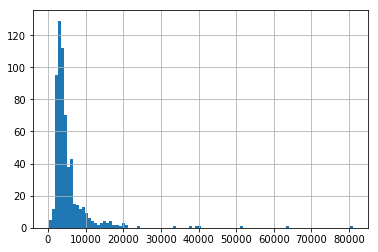

In [5]:
df["ApplicantIncome"].hist(bins=100)

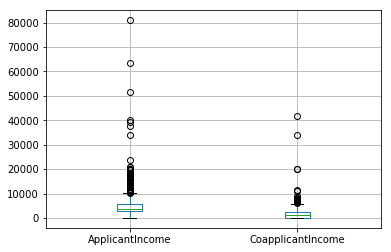

In [6]:
df.boxplot(["ApplicantIncome","CoapplicantIncome",])

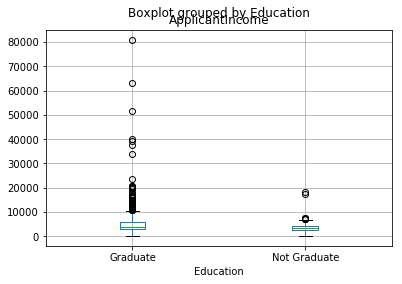

In [7]:
df.boxplot(column = "ApplicantIncome", by = "Education")

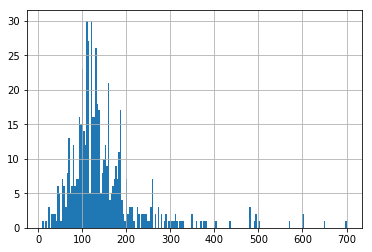

In [8]:
df["LoanAmount"].hist(bins=200)

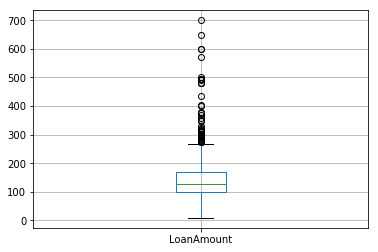

In [9]:
df.boxplot(column="LoanAmount")

In [10]:
temp1 = df["Credit_History"].value_counts(ascending=True)
temp2 = df.pivot_table(values="Loan_Status",index = "Credit_History",aggfunc = lambda x: x.map({"Y":1,"N":0}).mean())
print("Frequency table for Credit_History")
print(temp1)
print('\nProbility of getting loan for each Credit History class:')
print(temp2)

Frequency table for Credit_History
0.0     89
1.0    475
Name: Credit_History, dtype: int64

Probility of getting loan for each Credit History class:
                Loan_Status
Credit_History             
0.0                0.078652
1.0                0.795789


In [11]:
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Credit_History')
ax1.set_ylabel('Count of Applicants')
ax1.set_title("Applicants by Credit_History")
temp1.plot(kind='bar')


TypeError: 'module' object is not callable

In [12]:
ax2 = fig.add_subplot(122)
temp2.plot(kind = 'bar')
ax2.set_xlabel('Credit_History')
ax2.set_ylabel('Probability of getting loan')
ax2.set_title("Probability of getting loan by credit history")

NameError: name 'fig' is not defined

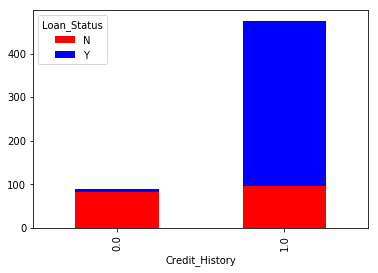

In [13]:
temp3 = pd.crosstab(df['Credit_History'], df['Loan_Status'])
temp3.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

In [14]:
df.apply(lambda x: sum(x.isnull()),axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [15]:
df["LoanAmount"].fillna(df["LoanAmount"].mean(),inplace = True)

In [16]:
df["Self_Employed"].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [17]:
df["Self_Employed"].fillna("No",inplace=True)
df.apply(lambda x: sum(x.isnull()),axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [18]:
df.pivot_table(values=["LoanAmount"], index=["Self_Employed"], columns = ["Education"],aggfunc = np.median)

LoanAmount             
Education       Graduate Not Graduate
Self_Employed                        
No                 131.0        115.0
Yes                152.0        130.0

In [19]:
table = df.pivot_table(values=["LoanAmount"], index=["Self_Employed"], columns = ["Education"],aggfunc = np.median)
#####_______________________________________________________________________________________________________
#________________________________________________________________________________________
def fage(x):
    return table.loc[x["Self_Employed"],x["Education"]]
#df['LoanAmount'].fillna     (     df[df['LoanAmount'].isnull()].apply(fage, axis=1)     , inplace=True          )

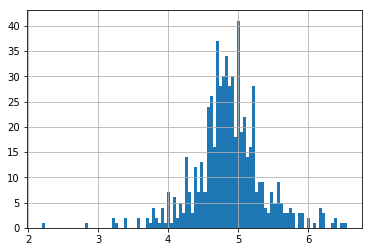

In [20]:
df["LoanAmount_log"] = np.log(df["LoanAmount"])
df["LoanAmount_log"].hist(bins=100)

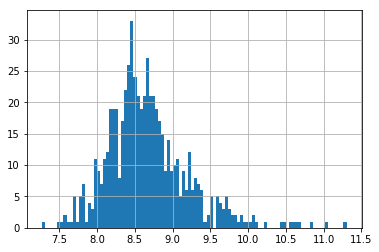

In [21]:
df["Total_Income"] = df["ApplicantIncome"]+df["CoapplicantIncome"]
df['TotalIncome_log'] = np.log(df['Total_Income'])
df['TotalIncome_log'].hist(bins=100)

In [36]:
df.apply(lambda x: sum(x.isnull()),axis=0)

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
LoanAmount_log       0
Total_Income         0
TotalIncome_log      0
dpb_possibility      0
dtype: int64

In [23]:
df["Gender"].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [24]:
df["Education"].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [25]:
pd.crosstab(df["Education"],df["Gender"],margins=True)

Gender,Female,Male,All
Education,,,
Graduate,92,376,468
Not Graduate,20,113,133
All,112,489,601


In [26]:
df["Gender"].fillna("Male",inplace=True)

In [27]:
df["Married"].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [28]:
df["Married"].fillna("Yes",inplace=True)

In [29]:
df["Dependents"].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [30]:
df["Dependents"].fillna("0",inplace=True)

In [31]:
df["Loan_Amount_Term"].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [32]:
df["Loan_Amount_Term"].fillna("360",inplace=True)

In [33]:
df["Credit_History"].fillna("1",inplace= True)

In [34]:
df["dpb_possibility"] = df["LoanAmount"]/df["Total_Income"]
df.describe()
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,Total_Income,TotalIncome_log,dpb_possibility
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360,1,Urban,Y,4.986426,5849.0,8.674026,0.025032
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360,1,Rural,N,4.852030,6091.0,8.714568,0.021015
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360,1,Urban,Y,4.189655,3000.0,8.006368,0.022000
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360,1,Urban,Y,4.787492,4941.0,8.505323,0.024287
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360,1,Urban,Y,4.948760,6000.0,8.699515,0.023500


In [35]:
from sklearn.preprocessing import LabelEncoder
var_mod = ["Gender","Married","Dependents","Education","Self_Employed","Property_Area","Loan_Status"]

le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])
df.dtypes 

Loan_ID               object
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term      object
Credit_History        object
Property_Area          int64
Loan_Status            int64
LoanAmount_log       float64
Total_Income         float64
TotalIncome_log      float64
dpb_possibility      float64
dtype: object

In [56]:
from sklearn.linear_model import LogisticRegression

# from sklearn.model_selection import KFold
from sklearn.cross_validation import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

def classification_model(model,data,predictors,outcome):
    model.fit(data[predictors],data[outcome])
    
    predictions = model.predict(data[predictors])
    
    accuracy = metrics.accuracy_score(predictions,data[outcome])
    print("Accuracy: %s" % "{0:.3%}".format(accuracy))
    
    kf = KFold(data.shape[0], n_folds =5,random_state=1)
    error = []
    for train,test in kf:
        
        train_predictors = data[predictors].iloc[train,:]
        
        train_target = data[outcome].iloc[train]
        
        model.fit(train_predictors,train_target)
        
        error.append(model.score(data[predictors].iloc[test,:],data[outcome].iloc[test]))
    
    print("Cross Validation Score: %s"%"{0:.3%}".format(np.mean(error)))
    
    

this is where we try for our models.............


In [57]:
outcome_var = "Loan_Status"
model = LogisticRegression()
predictor_var  = ["Credit_History"]
classification_model(model,df,predictor_var,outcome_var)

Accuracy: 80.945%
Cross Validation Score: 80.946%


In [60]:
predictor_var  = ["Credit_History","Education","Self_Employed"]
classification_model(model,df,predictor_var,outcome_var)

Accuracy: 80.945%
Cross Validation Score: 80.946%


In [67]:
model = DecisionTreeClassifier()
predictor_var  = ["Credit_History","Education","Gender","Married"]
classification_model(model,df,predictor_var,outcome_var)

Accuracy: 80.945%
Cross Validation Score: 80.946%


In [68]:
model = DecisionTreeClassifier()
predictor_var  = ["Credit_History","Loan_Amount_Term","LoanAmount_log"]
classification_model(model,df,predictor_var,outcome_var)

Accuracy: 89.414%
Cross Validation Score: 68.722%


In [72]:
model = RandomForestClassifier(n_estimators = 100)
predictor_var = ['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
        'LoanAmount_log','TotalIncome_log']
classification_model(model,df,predictor_var,outcome_var)
print("!!................................!!")
featimp = pd.Series(model.feature_importances_,index = predictor_var).sort_values(ascending = False)
print(featimp)

Accuracy: 100.000%
Cross Validation Score: 78.505%
!!................................!!
TotalIncome_log     0.264524
Credit_History      0.254980
LoanAmount_log      0.233375
Dependents          0.058425
Property_Area       0.053249
Loan_Amount_Term    0.039528
Married             0.028041
Education           0.023939
Self_Employed       0.022284
Gender              0.021653
dtype: float64


In [74]:
model = RandomForestClassifier(n_estimators = 25,min_samples_split = 25, max_depth = 7,max_features = 1)
predictor_var = ["TotalIncome_log","Credit_History","LoanAmount_log","Dependents","Property_Area"]
classification_model(model,df,predictor_var,outcome_var)

Accuracy: 83.062%
Cross Validation Score: 80.624%
